In [1]:
library('tidyverse')
library('data.table')
library('parallel')
library('dplyr')
library('ggpubr')

Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘readr’ was built under R version 4.3.3”
Warning message:
“package ‘purrr’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘forcats’ was built under R version 4.3.3”
Warning message:
“package ‘lubridate’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()

In [2]:
meta_data<- read.csv('/home//workspace/IHA_Figure_Revision/Dataset/scRNA_meta_data-2024-05-09.csv')

In [3]:
IMM_Age<-read.csv("02_IMM_Age_Metric/IMM_Age_Score.csv")
IMM_Age<-IMM_Age %>% select(SampleID,IMM_Age_Score)
colnames(IMM_Age)[1]<-"sample.sampleKitGuid"

In [4]:
df<-left_join(IMM_Age, meta_data)

Joining with `by = join_by(sample.sampleKitGuid)`


In [5]:
df_subet<- df %>% filter(sample.visitName=="Flu Year 1 Day 0")

In [6]:
colnames(df_subet)

[1] "sample.sampleKitGuid"                     
 [2] "IMM_Age_Score"                            
 [3] "X"                                        
 [4] "Unnamed..0"                               
 [5] "lastUpdated"                              
 [6] "sample.id"                                
 [7] "sample.bridgingControl"                   
 [8] "sample.visitName"                         
 [9] "sample.visitDetails"                      
[10] "sample.drawDate"                          
[11] "sample.daysSinceFirstVisit"               
[12] "file.id"                                  
[13] "file.name"                                
[14] "file.batchID"                             
[15] "file.panel"                               
[16] "file.pool"                                
[17] "file.fileType"                            
[18] "file.majorVersion"                        
[19] "subject.id"                               
[20] "subject.biologicalSex"                    
[21] "subject.birthYear"                        
[22] "subject.ethnicity"                        
[23] "subject.partnerCode"                      
[24] "subject.race"                             
[25] "subject.subjectGuid"                      
[26] "cohort.cohortGuid"                        
[27] "sample.diseaseStatesRecordedAtVisit"      
[28] "pbmc_sample_id"                           
[29] "subject.covidVaxDose1.daysSinceFirstVisit"
[30] "subject.covidVaxDose2.daysSinceFirstVisit"
[31] "Covid_exclusion"                          
[32] "subjectGuid"                              
[33] "CMV"

In [7]:
df_subet<-df_subet%>% mutate(`Age Group`=case_when(cohort.cohortGuid=="BR1"~"Young", TRUE~"Older"))
df_subet$`Age Group`<-factor(df_subet$`Age Group`,levels=c("Young","Older"))

In [8]:
write.csv(df_subet  %>% 
          select(pbmc_sample_id, `Age Group`,IMM_Age_Score),
          "/home//workspace/Source_Data/Extended_Fig4c.csv", 
          row.names=FALSE)

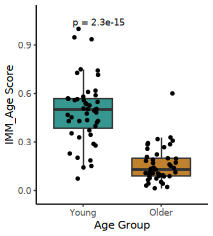

In [13]:
options(repr.plot.width = 45/25.4, repr.plot.height =  50/25.4)

p<-ggplot(df_subet  ,
              aes(x = `Age Group`, y = IMM_Age_Score)) +
    geom_boxplot( lwd=0.3, outlier.shape = NA,aes(fill = `Age Group`))+
    geom_point(aes(y = IMM_Age_Score), 
               position = position_jitter(width = 0.2), color="black", size=1, stroke=0) +
stat_compare_means(
  label = "p.format",
  size = 1.75,
  vjust = -0.5
) +
    theme_classic(base_size = 6) +
    scale_fill_manual(values = c("Older" = '#bf812d', 
                                 "Young" = '#35978f')) +
    scale_y_continuous(limits = c(NA, NA), 
                       expand = expansion(mult = c(0.1, 0.15)))+
ylab('IMM_Age Score')+ 
theme(
  axis.line = element_line(colour = "black"),
  legend.position = "none",
  legend.title = element_blank(),
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.border = element_blank(),
  panel.background = element_blank(),
  strip.background = element_rect(linewidth = 0),
  axis.title.x = element_text(margin = margin(t = 2)),
  panel.spacing = unit(-0.1, "mm"),
  strip.text = element_text(margin = margin(b = 1, t = 1))
)
p
ggsave('FigureC.pdf',p, width = 45/25.4, 
       height = 50/25.4)